In [164]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
# simulate truncated normal data
sim = np.random.normal(0.7, 0.55, size=10000)
sim_tr = sim[abs(sim)<1]

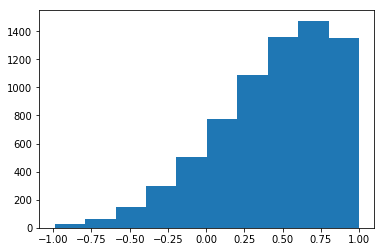

In [166]:
plt.hist(sim_tr);

In [167]:
mean_ = np.mean(sim_tr)
sd_ = np.std(sim_tr)
mean_, sd_

(0.4364645228258711, 0.3853971023473262)

Referring to [Parameter Estimation and Hypothesis Testing for
the Truncated Normal Distribution with Applications to Introductory Statistics Grades](https://scholarsarchive.byu.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=3052&context=etd), we have the following formula for truncated normal $X\sim N_{(a,b)}(\mu, \sigma)$

$$
\begin{split}
E(X)&=\mu+\frac{\phi(\frac{a-\mu}{\sigma})-\phi(\frac{b-\mu}{\sigma})}{\Phi(\frac{b-\mu}{\sigma})-\Phi(\frac{a-\mu}{\sigma})}\sigma\\
Var(X)& = \left[1+\frac{(\frac{a-\mu}{\sigma})\phi(\frac{a-\mu}{\sigma})-(\frac{b-\mu}{\sigma})\phi(\frac{b-\mu}{\sigma})}{\Phi(\frac{b-\mu}{\sigma})-\Phi(\frac{a-\mu}{\sigma})}-\left(\frac{\phi(\frac{a-\mu}{\sigma})-\phi(\frac{b-\mu}{\sigma})}{\Phi(\frac{b-\mu}{\sigma})-\Phi(\frac{a-\mu}{\sigma})}\right)^2\right]\sigma^2
\end{split}
$$

We could use method of Moments to estimate the parameters of the original (not truncated) normal distribution. But since the solution to this equation is apparently not explicit, we would use 'grid' (or alternatively some other iterative numerical methods).

In [168]:
norm = stats.norm()
a, b = -1, 1
mu = 0.5
sig = 1
p1 = norm.pdf((a-mu)/sig)
p2 = norm.pdf((b-mu)/sig)
P1 = norm.cdf((a-mu)/sig)
P2 = norm.cdf((b-mu)/sig)

In [169]:
mus = np.linspace(0, 1, 101)
sigs = np.linspace(0.5, 1.5, 101)
mus, sigs = np.meshgrid(mus, sigs)

In [170]:
rr = np.zeros_like(mus)
for i in range(mus.shape[0]):
    for j in range(mus.shape[1]):
        mu = mus[i][j]
        sig = sigs[i][j]
        p1 = norm.pdf((a-mu)/sig)
        p2 = norm.pdf((b-mu)/sig)
        P1 = norm.cdf((a-mu)/sig)
        P2 = norm.cdf((b-mu)/sig)
        rr[i][j] = (abs(mu + (p1-p2)/(P2-P1)*sig - np.mean(sim_tr)) +
                  abs(np.sqrt((1+((a-mu)/sig*p1-(b-mu)/sig*p2)/(P2-P1)-((p1-p2)/(P2-P1))**2)*sig**2) - np.std(sim_tr)))

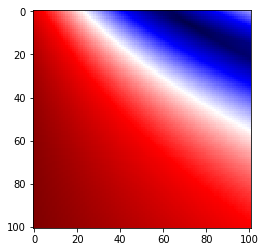

In [171]:
plt.imshow(rr, cmap='seismic')

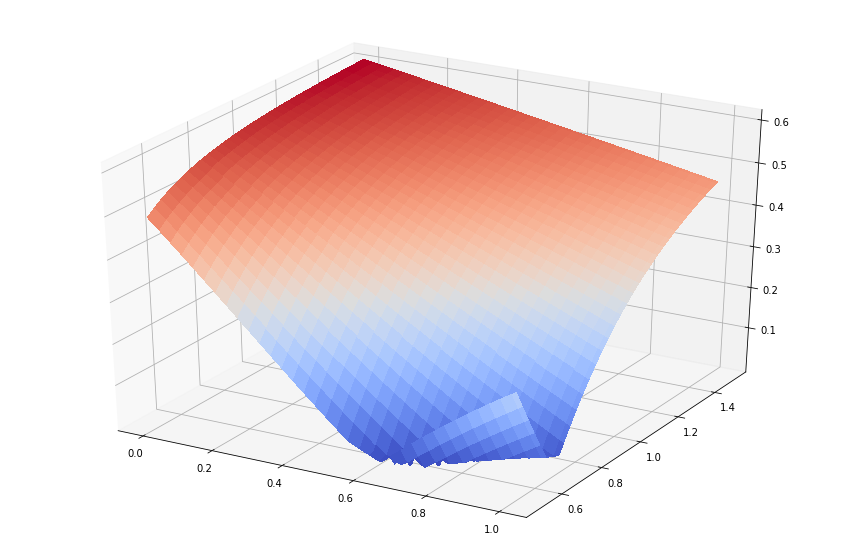

In [172]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(mus, sigs, rr, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [173]:
mus.ravel()[rr.argmin()], sigs.ravel()[rr.argmin()]

(0.72, 0.56)